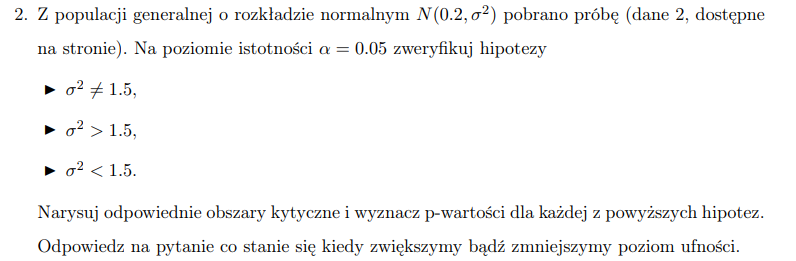

In [ ]:
install.packages("ggplot2")
install.packages("moments")
library(ggplot2)
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- read.delim("dane-zad2.txt", dec=".", header = FALSE)
str(data)
data <- data$V1

'data.frame':	1000 obs. of  1 variable:
 $ V1: num  0.5804 1.7424 1.6004 -0.2608 0.0331 ...


In [ ]:
h_0 <- 1.5
alfa <- 0.05
mi <- 0.2

In [ ]:
S_2 <- var(data)
n <- length(data)

In [ ]:
Chi <- (n-1)*S_2/h_0
Chi

[1] 1110.968

In [ ]:
a_low <- qchisq(alfa/2, n-1)
a_high <- qchisq(1-alfa/2, n-1)
a_low
a_high

[1] 913.301

[1] 1088.487

In [ ]:
x <- seq(750, 1250, 0.1)
x2 <- seq(750, a_low, 0.01)
x3 <- seq(a_high, 1250, 0.01)

In [ ]:
chisquareDistribution <- data.frame(
    x = seq(750,1250, by=0.01),
    y = dchisq(seq(750,1250, by=0.01), n-1)
)

In [ ]:
c(qchisq(alfa/2, n-1), qchisq(1-alfa/2, n-1))

[1]  913.301 1088.487

In [ ]:
criticalValues <- c(qchisq(alfa/2, n-1), qchisq(1-alfa/2, n-1))

shadeChiTwoTailedLeft <- rbind(c(criticalValues[1],0), subset(chisquareDistribution, x < criticalValues[1]))

shadeChiTwoTailedRight <- rbind(c(criticalValues[2],0), subset(chisquareDistribution, x > criticalValues[2]), c(3,0))

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



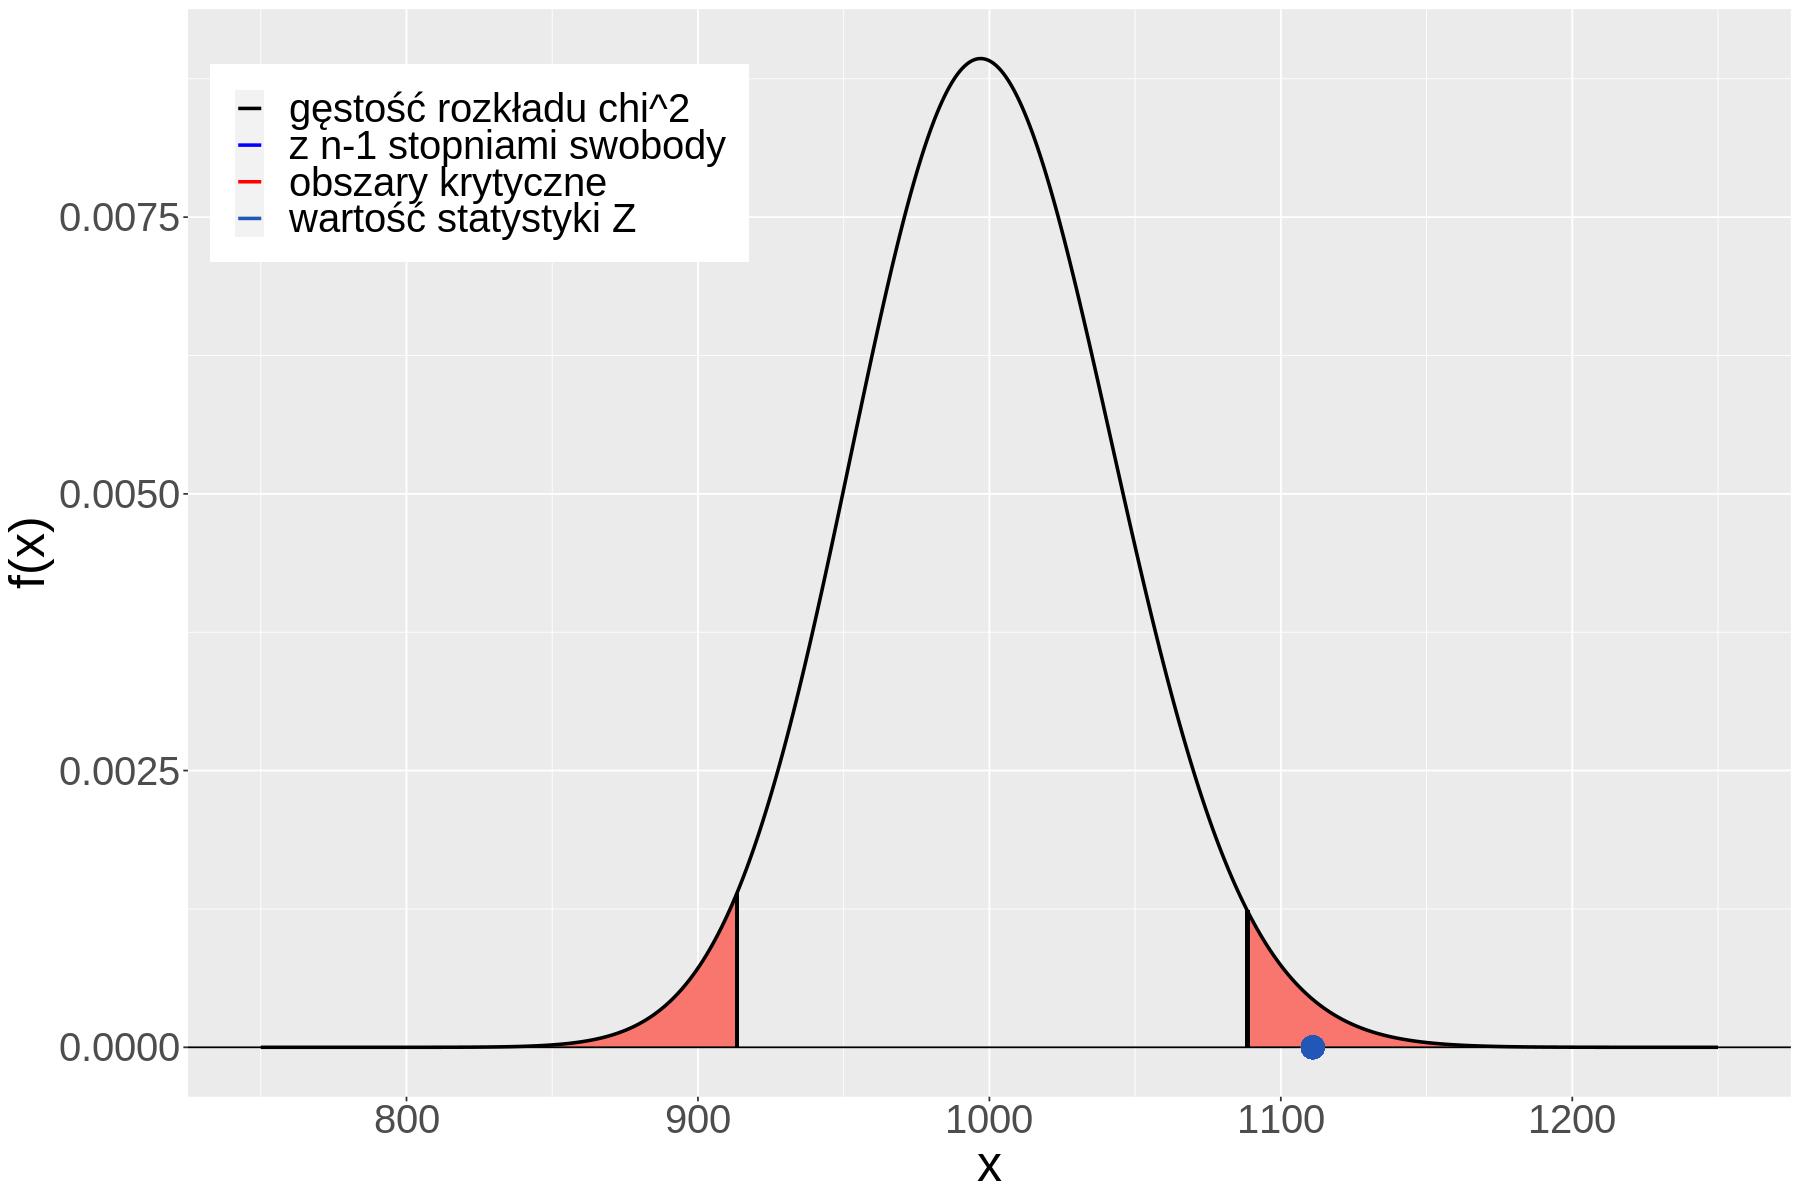

In [ ]:
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu chi^2" = 'black',"z n-1 stopniami swobody" = "blue" , 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = shadeChiTwoTailedLeft, aes(x=x, y=y, fill="red")) +
    geom_polygon(data = shadeChiTwoTailedRight, aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ="gęstość rozkładu chi^2"), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dchisq(criticalValues[1], n-1)),  size=0.8) +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dchisq(criticalValues[2], n-1)), size=1.2) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



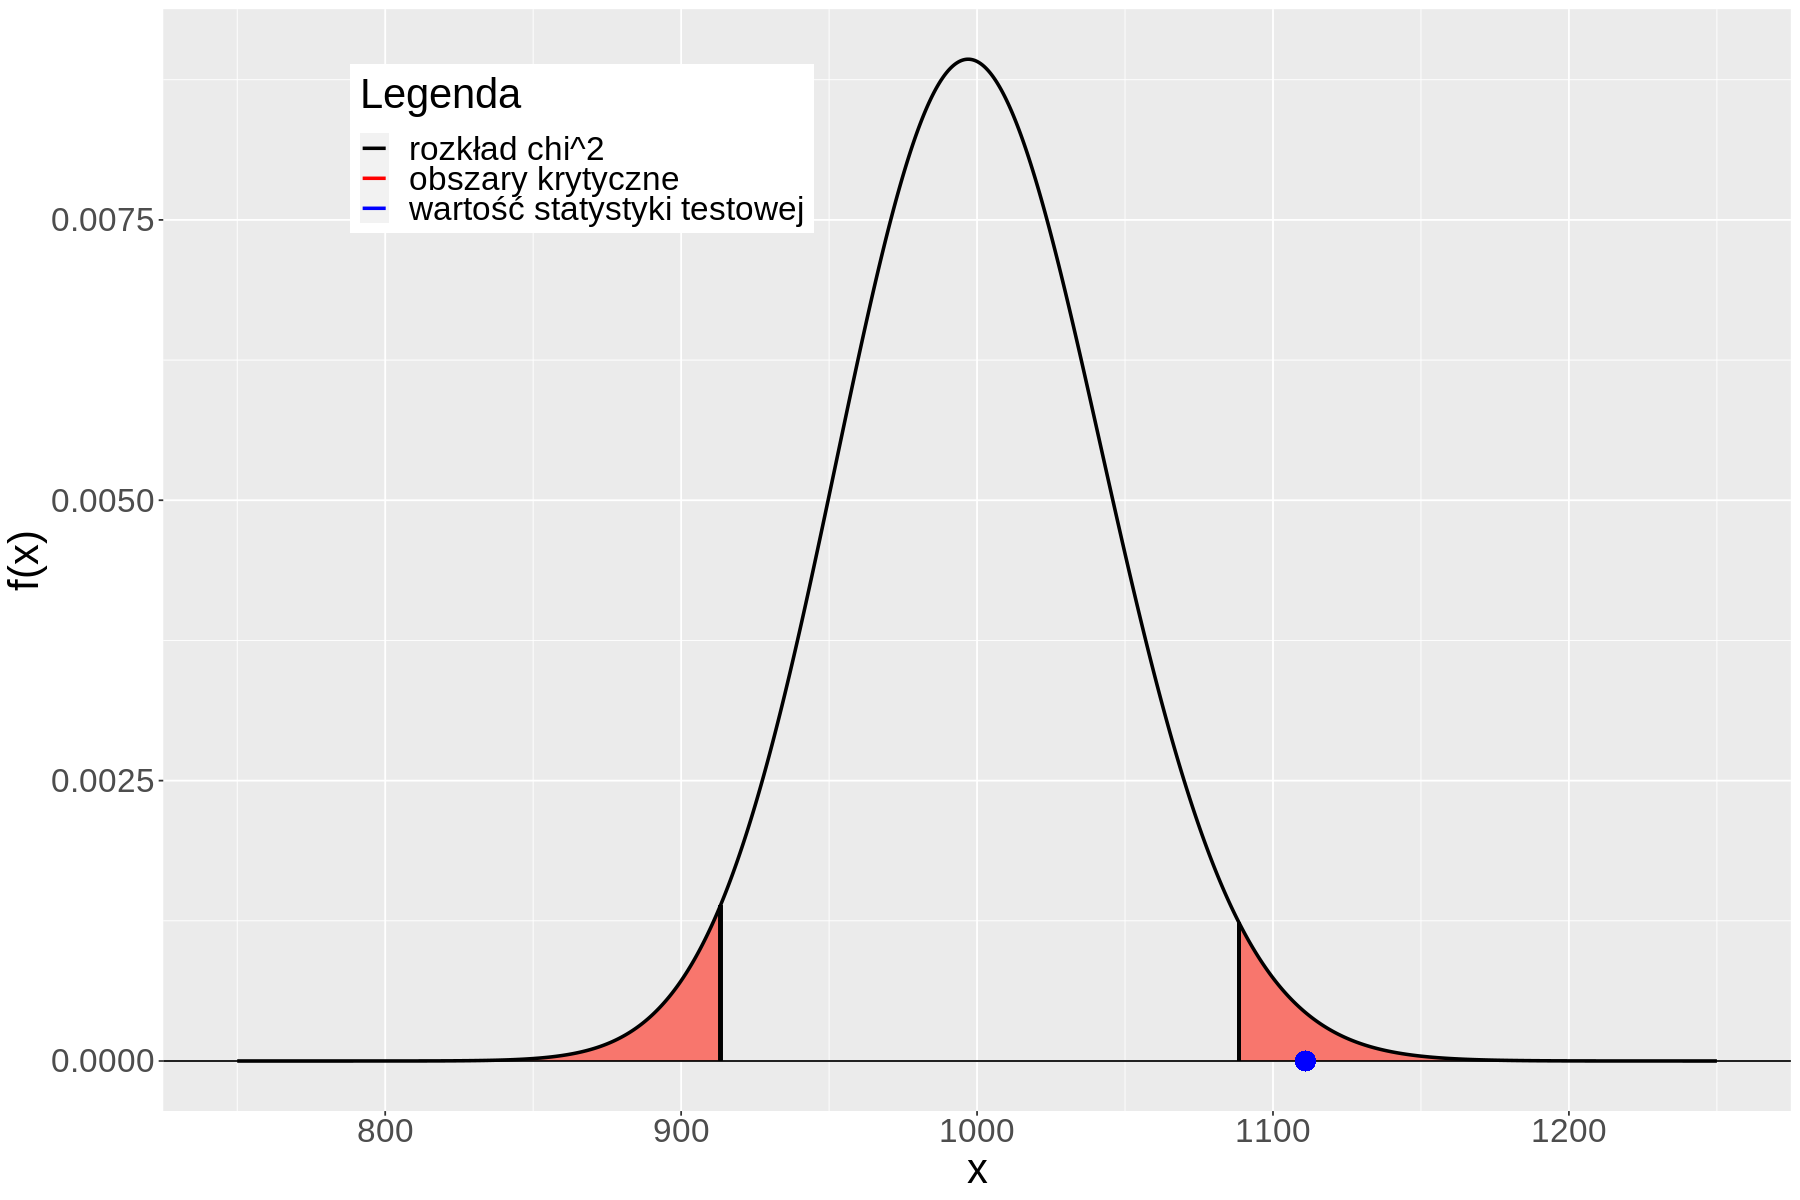

In [ ]:
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("rozkład chi^2" = 'black', 'obszary krytyczne'='red', 'wartość statystyki testowej'= 'blue')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = shadeChiTwoTailedLeft, aes(x=x, y=y, fill="red")) +
    geom_polygon(data = shadeChiTwoTailedRight, aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='rozkład chi^2'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dchisq(criticalValues[1], n-1)),  size=0.9) +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dchisq(criticalValues[2], n-1)), size=0.8) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='blue', size=5) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=25, family="Arial")) +
    theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual('Legenda', values = colors)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



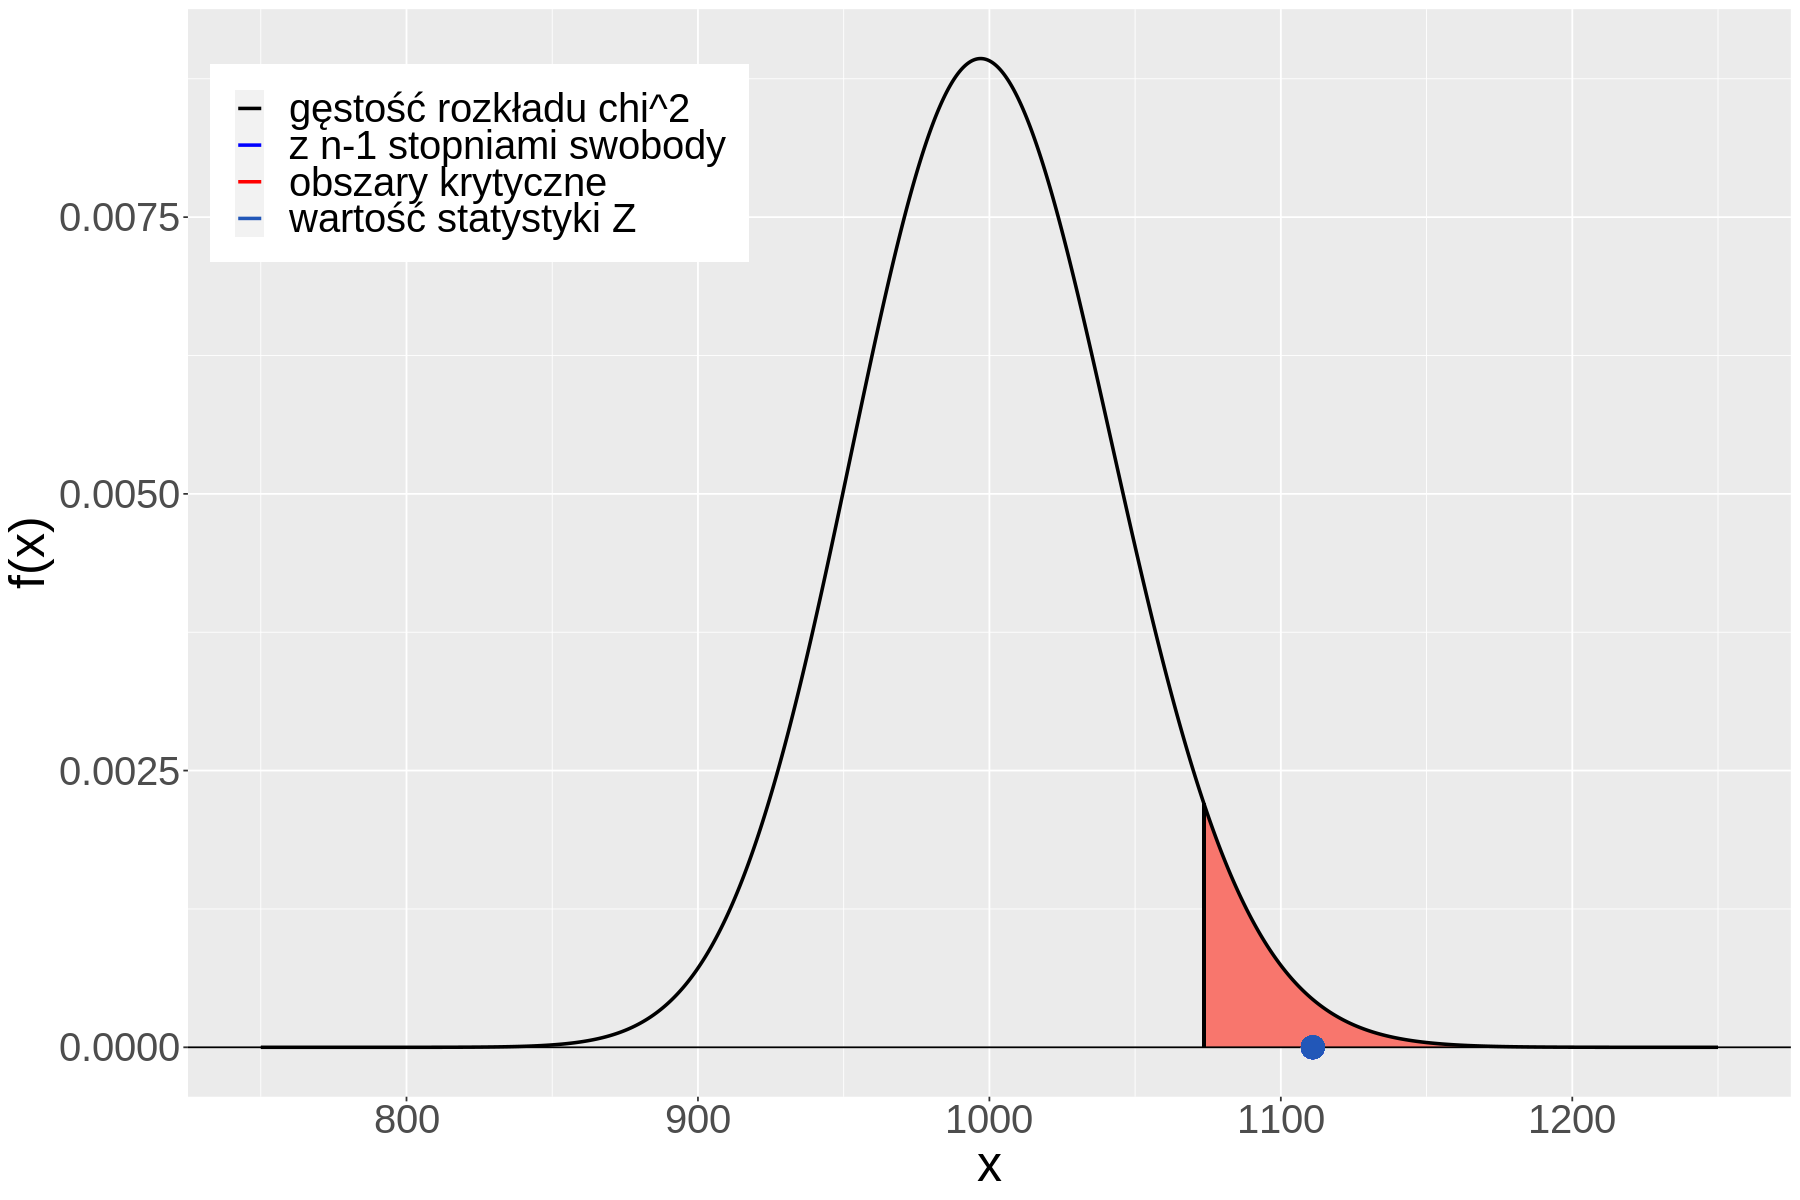

In [ ]:
b_high <- qchisq(1-alfa, n-1)
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu chi^2" = 'black',"z n-1 stopniami swobody" = "blue" , 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = rbind(c(b_high,0), subset(chisquareDistribution, x > b_high), c(3,0)), aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ="gęstość rozkładu chi^2"), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = b_high, y = 0, xend = b_high, yend = dchisq(b_high, n-1)),  size=0.9) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors)

In [ ]:
qchisq(1-alfa, n-1)

[1] 1073.643

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



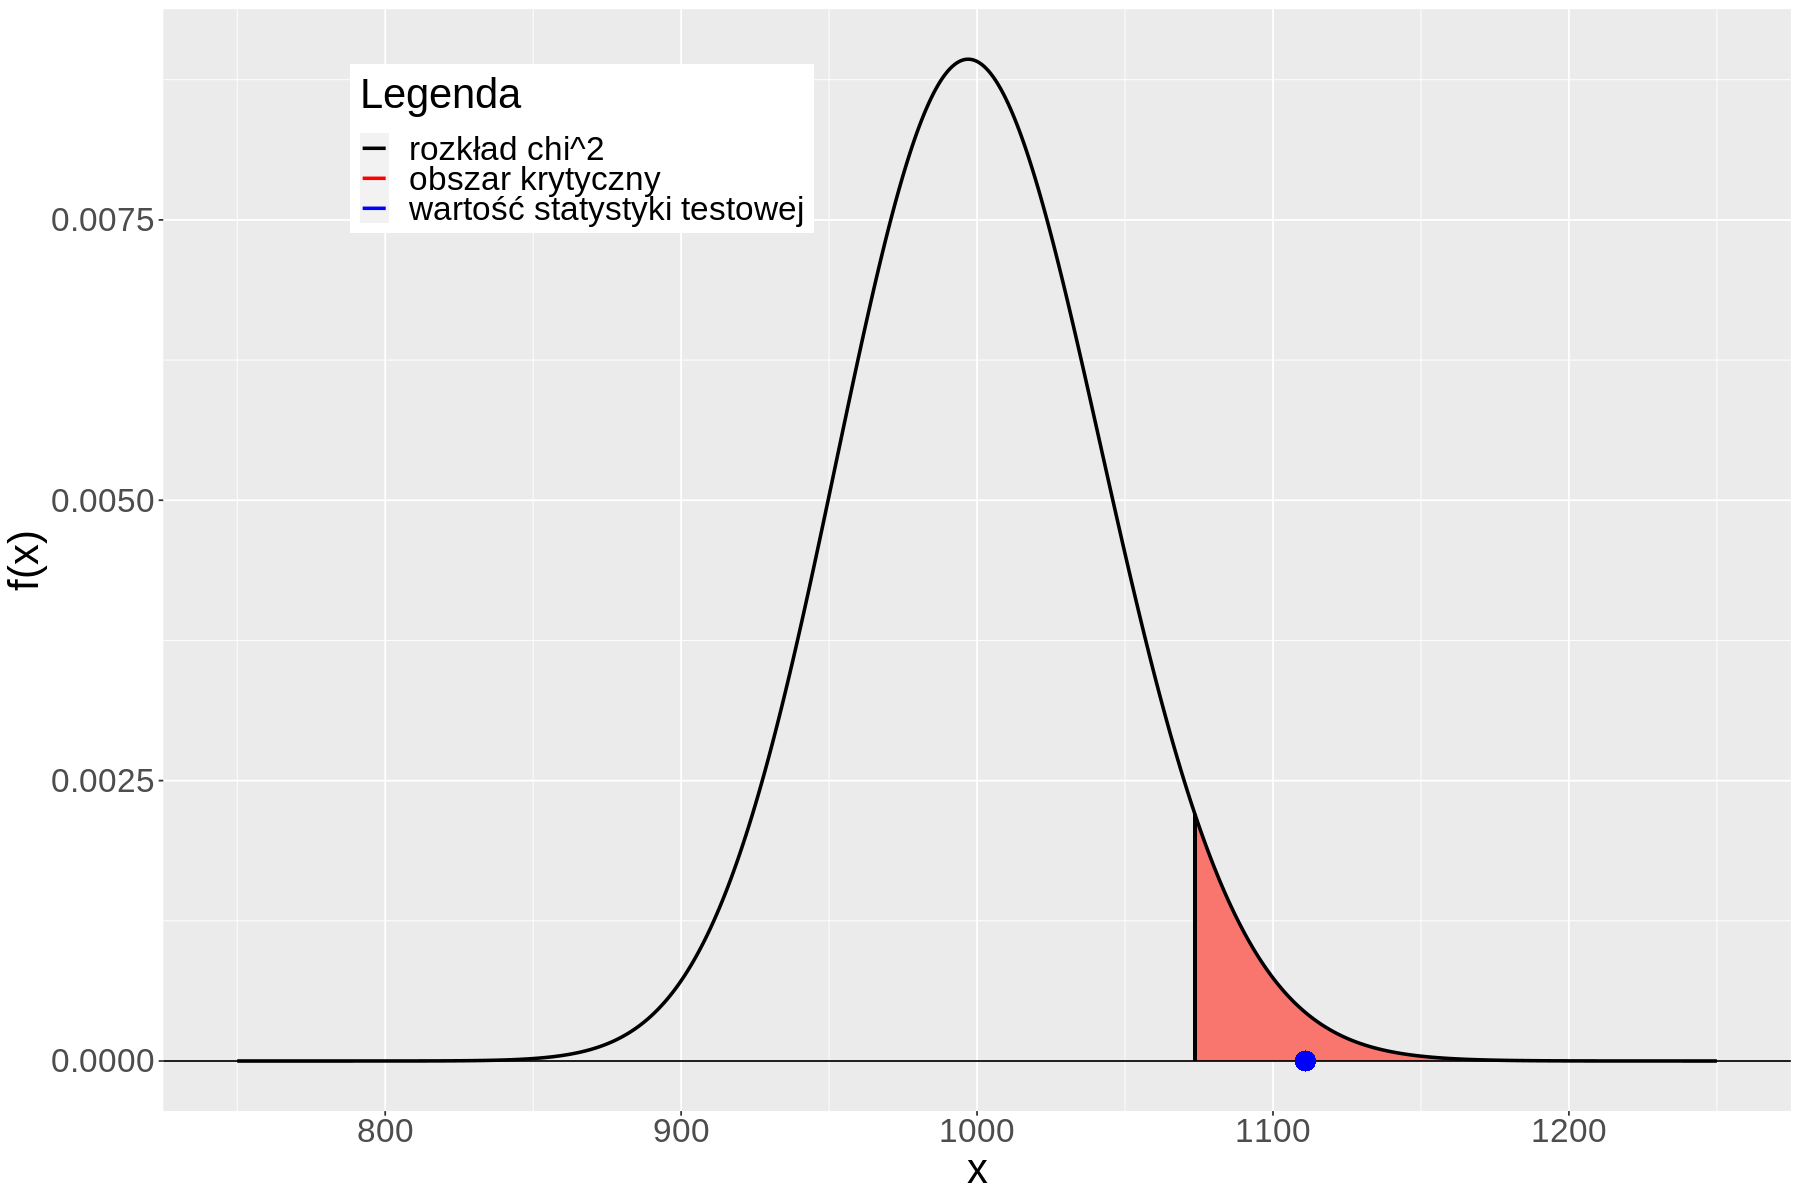

In [ ]:
b_high <- qchisq(1-alfa, n-1)
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("rozkład chi^2" = 'black', 'obszar krytyczny'='red', 'wartość statystyki testowej'= 'blue')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = rbind(c(b_high,0), subset(chisquareDistribution, x > b_high), c(3,0)), aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='rozkład chi^2'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = b_high, y = 0, xend = b_high, yend = dchisq(b_high, n-1)),  size=0.9) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='blue', size=5) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=25, family="Arial")) +
    theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual('Legenda', values = colors)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



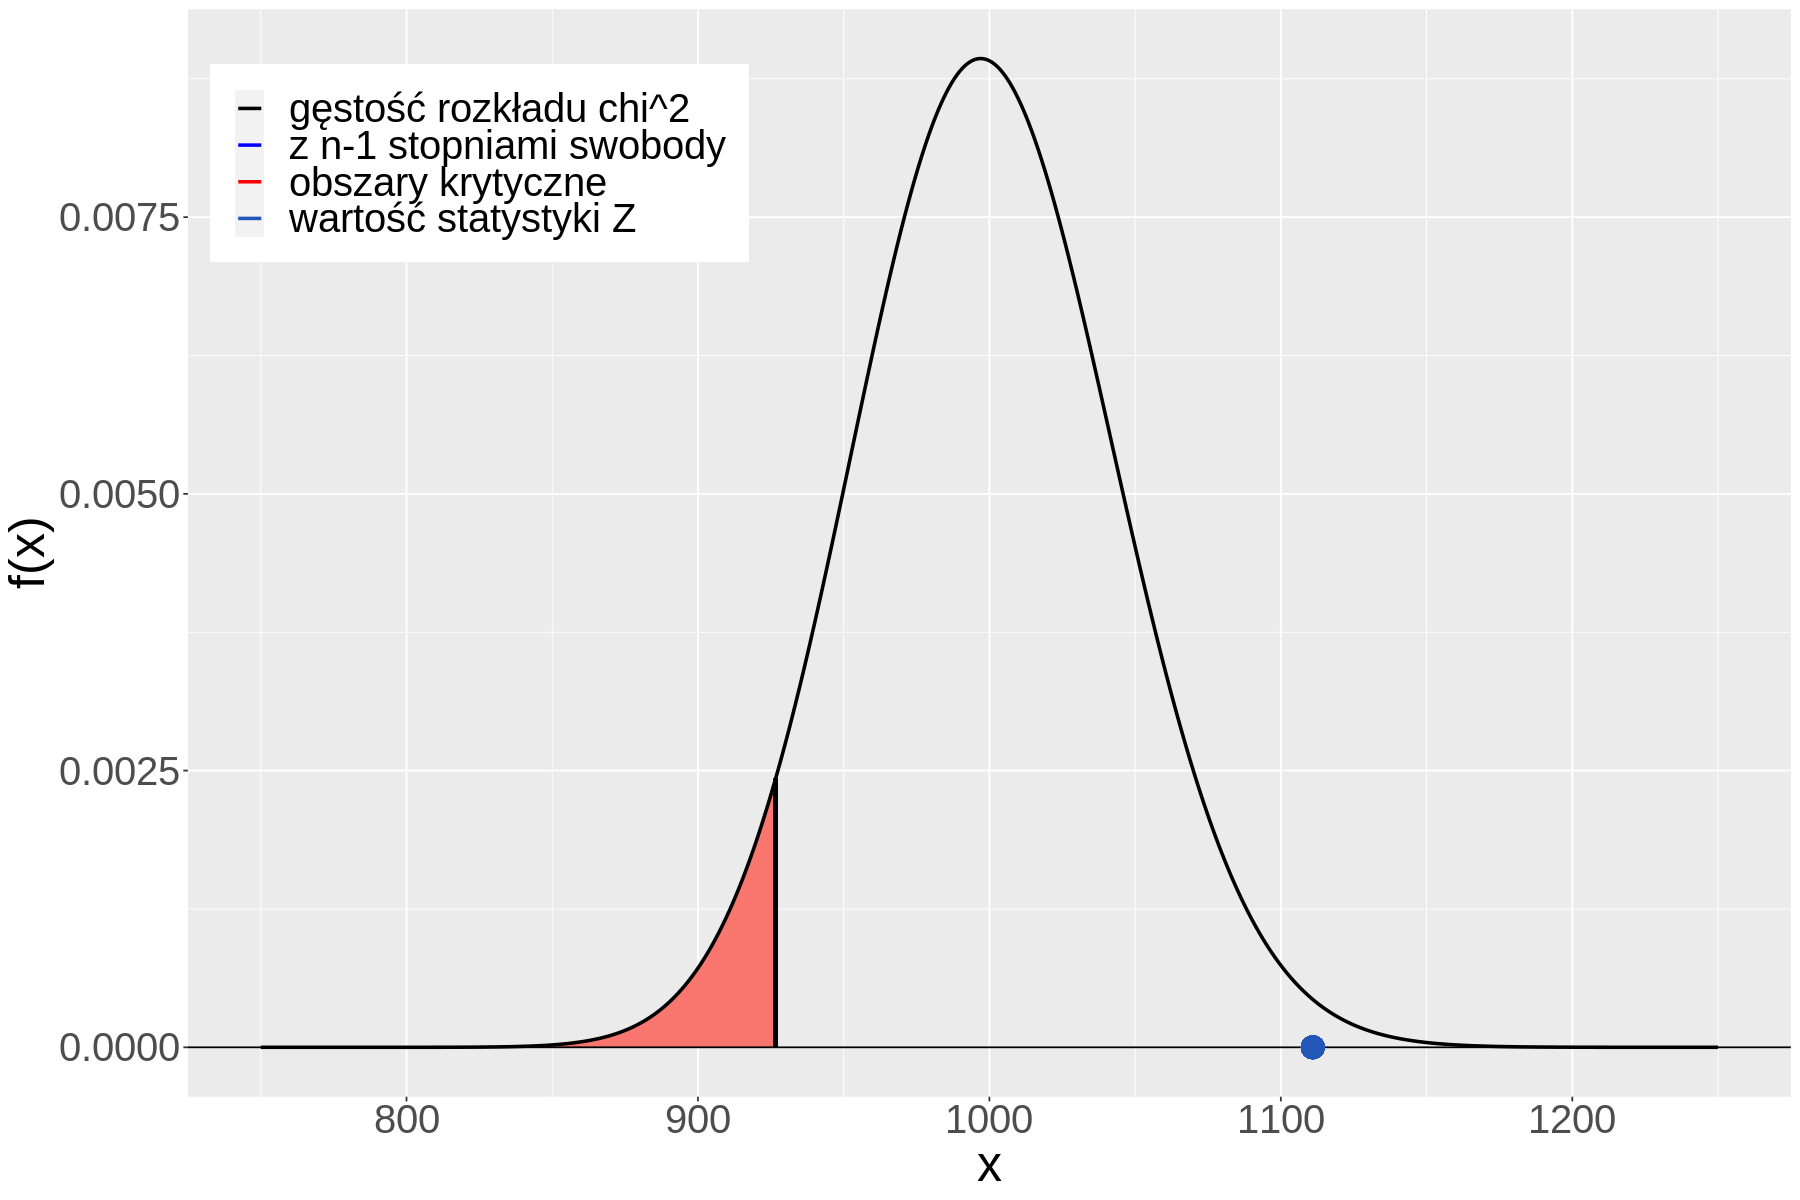

In [ ]:
c_high <- qchisq(alfa, n-1)
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu chi^2" = 'black',"z n-1 stopniami swobody" = "blue" , 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = rbind(c(c_high,0), subset(chisquareDistribution, x < c_high), c(3,0)), aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ="gęstość rozkładu chi^2"), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = c_high, y = 0, xend = c_high, yend = dchisq(c_high, n-1)),  size=0.9) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



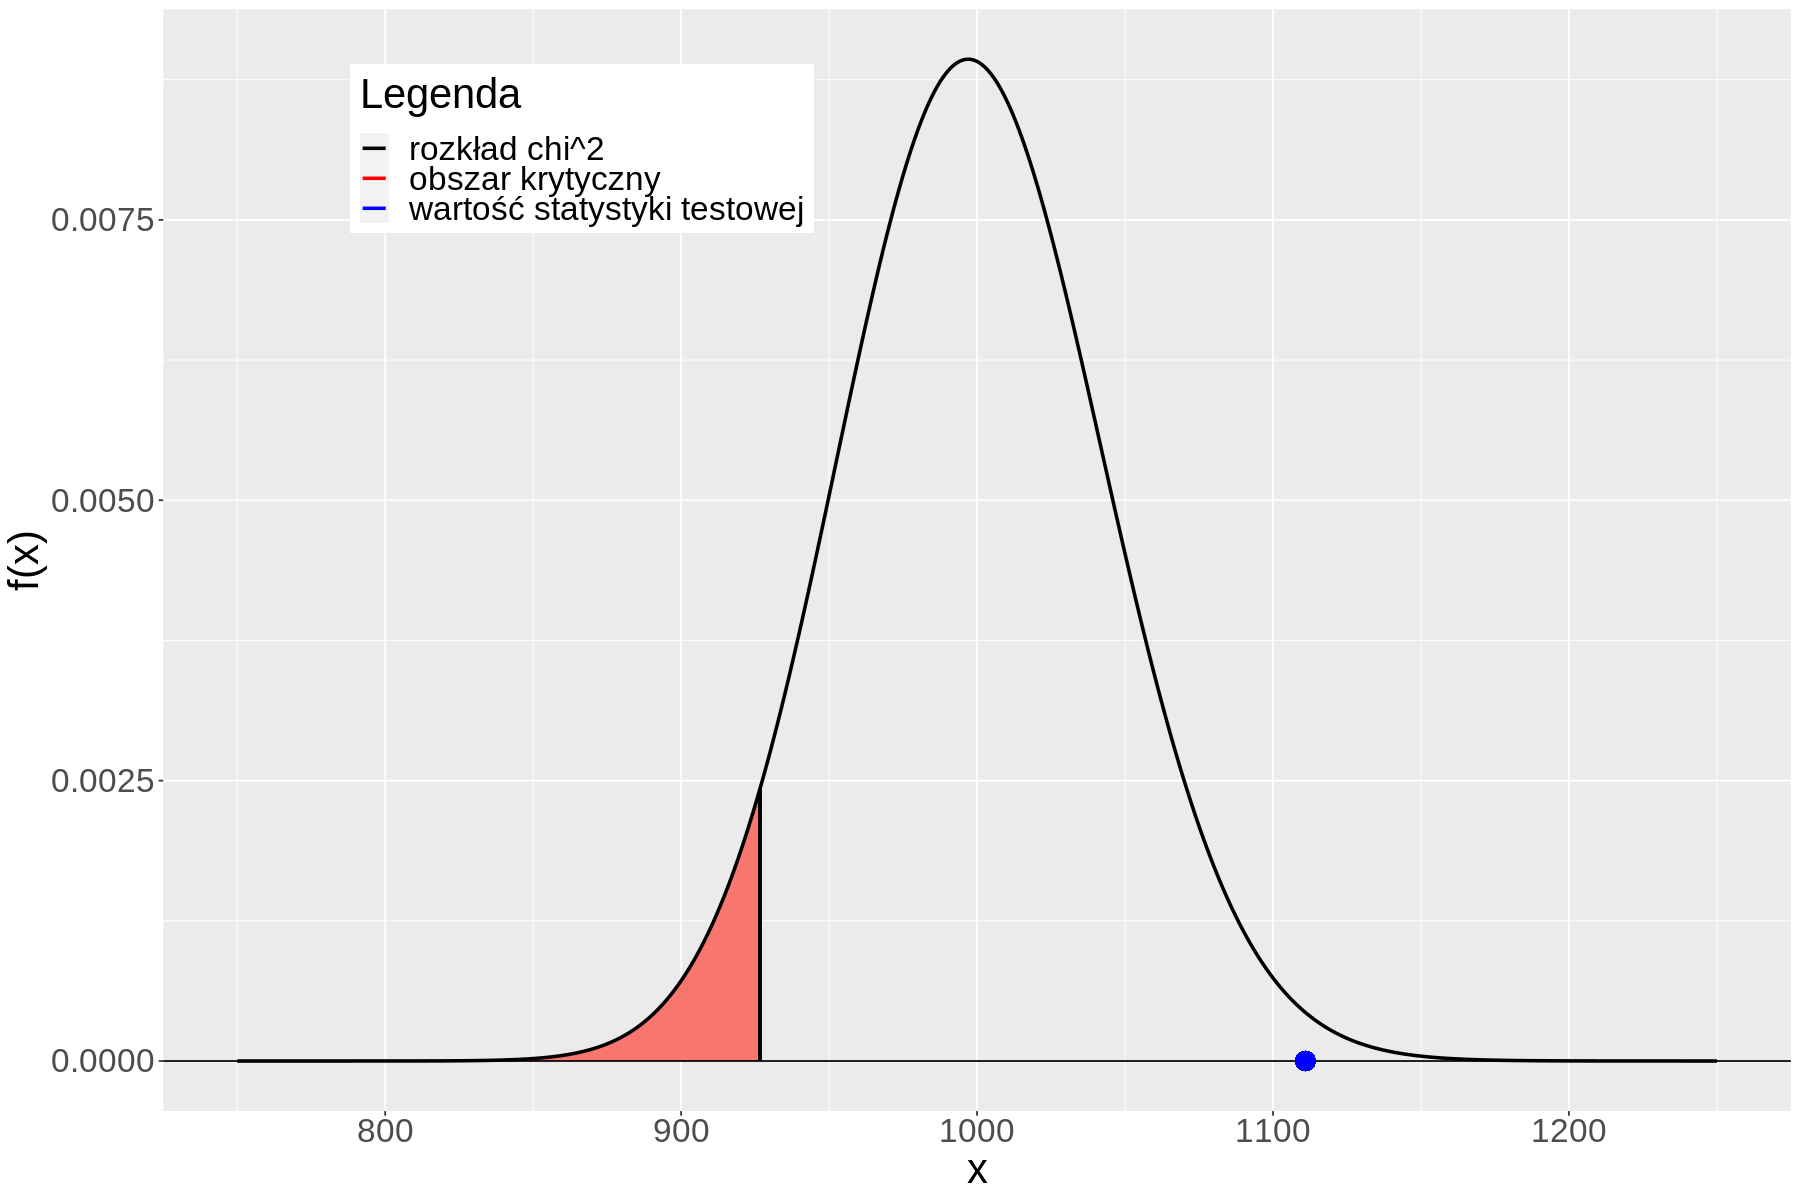

In [ ]:
c_high <- qchisq(alfa, n-1)
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("rozkład chi^2" = 'black', 'obszar krytyczny'='red', 'wartość statystyki testowej'= 'blue')
ggplot(chisquareDistribution, aes(x,y)) +
    geom_polygon(data = rbind(c(c_high,0), subset(chisquareDistribution, x < c_high), c(3,0)), aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='rozkład chi^2'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = c_high, y = 0, xend = c_high, yend = dchisq(c_high, n-1)),  size=0.9) +
    scale_x_continuous(breaks=seq(750, 1250,50)) +
    xlim(750, 1250) +
    geom_point(aes(x=Chi,y=0), col='blue', size=5) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=25, family="Arial")) +
    theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual('Legenda', values = colors)

In [ ]:
qchisq(alfa, n-1)

[1] 926.6312

In [ ]:
Chi

[1] 1110.968

In [ ]:
p_value_a <- 2-2*(pchisq(abs(Chi), n-1))
p_value_a

[1] 0.01502325

In [ ]:
p_value_b <- 1 - pchisq(Chi, n-1)
p_value_b

[1] 0.007511626

In [ ]:
p_value_c <- pchisq(Chi, n-1)
p_value_c

[1] 0.9924884

In [ ]:
mi <- 1.5
sigma <- 0.2
N <- 1000

In [ ]:
alpha <- 0.05

In [ ]:
#dla sigma^2 != 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Chi <- (n-1)*var(X)/(sigma^2)
  lewy_kwantyl <- qchisq(alpha/2, n-1)
  prawy_kwantyl <- qchisq(1-alpha/2, n-1)
  if (Chi < lewy_kwantyl){
    x <- x + 1
  }
  else if (Chi > prawy_kwantyl){
    x <- x+1
  }
}
blad_pierwszego_rodzaju_a <- x/N
blad_pierwszego_rodzaju_a

[1] 0.051

In [ ]:
#dla sigma^2 > 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Chi <- (n-1)*var(X)/(sigma^2)
  lewy_kwantyl <- qchisq(1-alpha, n-1)
  if (Chi > lewy_kwantyl){
    x <- x + 1
  }
}
blad_pierwszego_rodzaju_b <- x/N
blad_pierwszego_rodzaju_b

[1] 0.045

In [ ]:
#dla sigma^2 < 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Chi <- (n-1)*var(X)/(sigma^2)
  lewy_kwantyl <- qchisq(alpha, n-1)
  if (Chi < lewy_kwantyl){
    x <- x + 1
  }
}
blad_pierwszego_rodzaju_c <- x/N
blad_pierwszego_rodzaju_c

[1] 0.041

In [ ]:
alpha <- 0.05
a_vec <- numeric()
for(m in 1:100){
  x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Chi <- (n-1)*var(X)/(sigma^2)
  lewy_kwantyl <- qchisq(alpha/2, n-1)
  prawy_kwantyl <- qchisq(1-alpha/2, n-1)
  if (Chi < lewy_kwantyl){
    x <- x + 1
  }
  else if (Chi > prawy_kwantyl){
    x <- x+1
  }
}
a_vec[m] <- x/N
}
a_vec

[1] 0.047 0.051 0.062 0.037 0.049 0.051 0.050 0.042 0.043 0.057 0.051 0.054
 [13] 0.056 0.058 0.051 0.041 0.053 0.048 0.060 0.053 0.048 0.055 0.032 0.061
 [25] 0.044 0.049 0.059 0.054 0.049 0.052 0.056 0.055 0.054 0.049 0.047 0.055
 [37] 0.052 0.045 0.068 0.046 0.056 0.047 0.034 0.054 0.051 0.059 0.045 0.057
 [49] 0.052 0.059 0.043 0.049 0.049 0.048 0.050 0.045 0.054 0.052 0.038 0.048
 [61] 0.044 0.048 0.047 0.050 0.049 0.047 0.038 0.050 0.056 0.055 0.044 0.049
 [73] 0.056 0.049 0.061 0.057 0.046 0.055 0.041 0.045 0.050 0.056 0.053 0.053
 [85] 0.056 0.044 0.051 0.044 0.057 0.057 0.046 0.049 0.046 0.057 0.057 0.043
 [97] 0.041 0.055 0.051 0.046

In [ ]:
df <-data.frame(a_vec)

In [ ]:
df$a_vec

[1] 0.047 0.051 0.062 0.037 0.049 0.051 0.050 0.042 0.043 0.057 0.051 0.054
 [13] 0.056 0.058 0.051 0.041 0.053 0.048 0.060 0.053 0.048 0.055 0.032 0.061
 [25] 0.044 0.049 0.059 0.054 0.049 0.052 0.056 0.055 0.054 0.049 0.047 0.055
 [37] 0.052 0.045 0.068 0.046 0.056 0.047 0.034 0.054 0.051 0.059 0.045 0.057
 [49] 0.052 0.059 0.043 0.049 0.049 0.048 0.050 0.045 0.054 0.052 0.038 0.048
 [61] 0.044 0.048 0.047 0.050 0.049 0.047 0.038 0.050 0.056 0.055 0.044 0.049
 [73] 0.056 0.049 0.061 0.057 0.046 0.055 0.041 0.045 0.050 0.056 0.053 0.053
 [85] 0.056 0.044 0.051 0.044 0.057 0.057 0.046 0.049 0.046 0.057 0.057 0.043
 [97] 0.041 0.055 0.051 0.046

Warning message:
“Use of `df$a_vec` is discouraged. Use `a_vec` instead.”


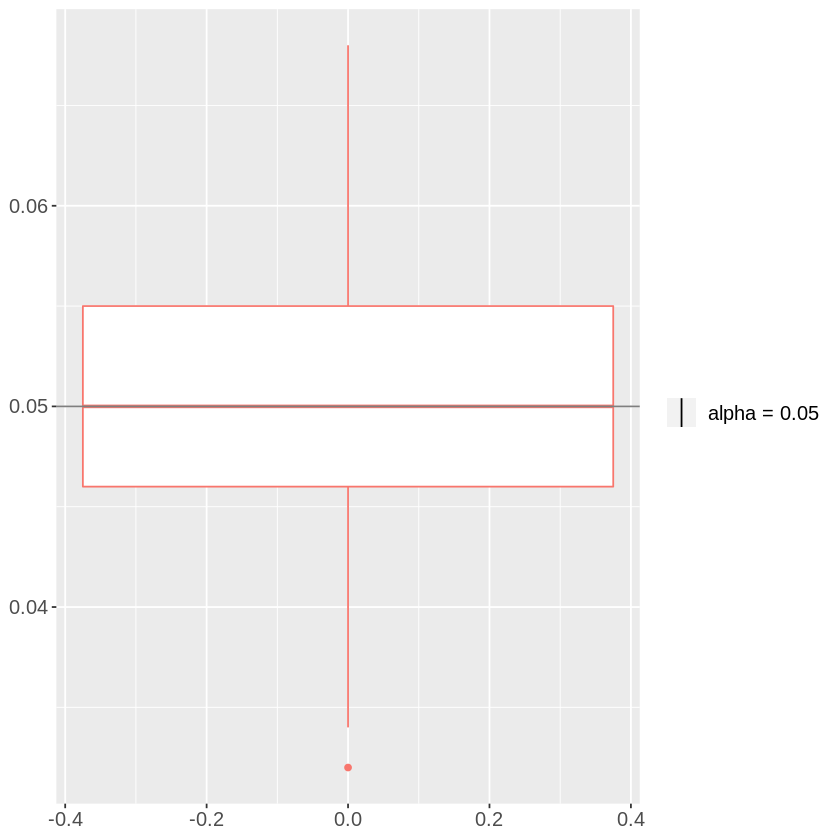

In [ ]:
ggplot(df, aes(x = df$a_vec)) +
  geom_boxplot(col='#f8766d') +
  labs(x=NULL) +
  coord_flip() +
  theme(text = element_text(size=15, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5))  +
  geom_vline(aes(color='black', , xintercept = 0.05)) +
  scale_color_manual(name = NULL, values = c("alpha = 0.05" = "black"))

In [ ]:
alpha <- 0.055
s2 <- 1.47

In [ ]:
N <- 1000

In [ ]:
#dla sigma^2 != 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, 0.2, sqrt(s2))
  Chi <- (n-1)*var(X)/(s2)
  lewy_kwantyl <- qchisq(alpha/2, n-1)
  prawy_kwantyl <- qchisq(1-alpha/2, n-1)
  if (Chi < lewy_kwantyl & Chi > prawy_kwantyl){
    x <- x + 1
  }
}
blad_pierwszego_rodzaju_a <- x/N
blad_pierwszego_rodzaju_a

[1] 0

In [ ]:
NN <- 100000
bl_2_rodzaju_a <- function(s2){
  y <- 0
  for (i in 1:NN){
    X <- rnorm(1000, 0.2, s2)
    Chi <- (1000-1)*var(X)/(1.5)^2
    lewy_kwantyl <- qchisq(0.055/2, 1000-1)
    prawy_kwantyl <- qchisq(1-0.055/2, 1000-1)
    if (Chi > lewy_kwantyl & Chi < prawy_kwantyl){
      y <- y + 1
  }
  }
  return(y/NN)
}

In [ ]:
bl_2_rodzaju_a(1.47)

[1] 0.84705

In [ ]:
bl_2_rodzaju_a(1.48)
bl_2_rodzaju_a(1.49)
bl_2_rodzaju_a(1.51)
bl_2_rodzaju_a(1.52)
bl_2_rodzaju_a(1.53)

[1] 0.90099

[1] 0.93741

[1] 0.93289

[1] 0.89853

[1] 0.84002

In [ ]:
#dla sigma^2 > 1.5
NN <- 1000
bl_2_rodzaju_b <- function(s2){
  y <- 0
  for (i in 1:NN){
    X <- rnorm(1000, 0.2, sqrt(s2))
    Chi <- (1000-1)*var(X)/(1.5)
    prawy_kwantyl <- qchisq(1-0.05, 1000-1)
    if (Chi < prawy_kwantyl){
      y <- y + 1
  }
  }
  return(y/NN)
}

In [ ]:
bl_2_rodzaju_b(1.51)
bl_2_rodzaju_b(1.52)
bl_2_rodzaju_b(1.53)

[1] 0.941

[1] 0.896

[1] 0.893

In [ ]:
#dla sigma^2 < 1.5
NN <- 1000
bl_2_rodzaju_c <- function(s2){
  y <- 0
  for (i in 1:NN){
    X <- rnorm(1000, 0.2, sqrt(s2))
    Chi <- (1000-1)*var(X)/(1.5)
    lewy_kwantyl <- qchisq(0.05, 1000-1)
    if (Chi > lewy_kwantyl){
      y <- y + 1
  }
  }
  return(y/NN)
}

In [ ]:
bl_2_rodzaju_c(1.47)
bl_2_rodzaju_c(1.48)
bl_2_rodzaju_c(1.49)

[1] 0.879

[1] 0.908

[1] 0.936

In [ ]:
1-0.847
1-0.901
1-0.937
1-0.933
1-0.899
1-0.840

[1] 0.153

[1] 0.099

[1] 0.063

[1] 0.067

[1] 0.101

[1] 0.16

In [ ]:
1-0.941
1-0.896
1-0.893

[1] 0.059

[1] 0.104

[1] 0.107

In [ ]:
1-0.879
1-0.908
1-0.936

[1] 0.121

[1] 0.092

[1] 0.064